<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

- Michael Hudon
- Émile Poirier
- Justin Binette
- Sébastien Rouleau

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `tds2Danimation_hXX.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leur trajectoire ballistique. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude du mouvement des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `tds2Danimation_hXX.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# 1<sup>re</sup> partie - Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [1]:
import os
import sys


os.chdir('C:/Users/EmilePc/Documents/GitHub/TP_Num_Thermo_Stat')    #   Mettre le path de ou ce trouve les fichiers Jupyter.

In [26]:
!python tds2Danimation_h25.py
# Remplacez "XX" par les deux derniers chiffres de l'année de votre session.
# N'hésitez pas à exécuter l'animation 2D ou la simulation 3D à l'extérieur du _Notebook_. Cette cellule vise à préciser que les questions qui suivent se basent sur ces scripts et doivent mener aux mêmes réponses autant en 2D qu'en 3D.

Données sauvegardées dans le fichier C:\Users\EmilePc\Documents\GitHub\TP_Num_Thermo_Stat\p_data.json


### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour calculer la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ en écrivant le code nécessaire dans la cellule qui suit. 

In [15]:
import json
import numpy as np

# Charger les données du fichier JSON (généralisation pour 2D)
def get_quantite_mouvement(filename="p_data.json"):
    with open(filename, 'r') as f:
        data = json.load(f)
    # Retourne toutes les dimensions disponibles (x, y)
    return [[item.get('x', 0), item.get('y', 0)] for item in data]

p = get_quantite_mouvement()

p_x = [item[0] for item in p]  # Liste des composantes x
p_y = [item[1] for item in p]  # Liste des composantes y

p_carre = [x ** 2 + y ** 2 for x, y in zip(p_x, p_y)]

# Calculer la moyenne de p^2
p2_moyenne = np.mean(p_carre)

# Afficher le résultat
print(f"La moyenne de p^2 est : {p2_moyenne}")

La moyenne de p^2 est : 5.600000000000004e-47



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ en répartissant l'énergie également sur chaque degré de liberté ici en translation seulement d'où, au total pour $\text{DIM}=1,2\text{ ou } 3$ dimensions d'espace réel,
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=\text{DIM}\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [16]:
DIM = 2 #Nombre de degrés de liberté de la simulation
mass = 4E-3/6E23 # helium mass
k = 1.4E-23 # Boltzmann constant
T = 300 #Température début

def Ecin(p2, m):
    return p2_moyenne / (2 * m)

def Temp(Ecin_moyenne):
    return (2*Ecin_moyenne)/(DIM*k)

T_final = Temp(Ecin(p2_moyenne, mass))

print(f"La température du gaz de sphères dures au début et à la fin de la simulation sont: {T}K et {T_final}K")

La température du gaz de sphères dures au début et à la fin de la simulation sont: 300K et 300.0000000000003K


**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [4]:
# Choix de la particule suivit entre chaque collision.
# Ligne du code =

id_particule = 1

#-------------------------------------------------------------------------------------------------------------------------------------------------

# Met en rouge la particule suivit.
# Ligne du code =

if i == id_particule:
    Atoms.append(simple_sphere(pos=vector(x,y,z), radius=Ratom, color=color.red))

#-------------------------------------------------------------------------------------------------------------------------------------------------

# Initialisation des listes finale de distance et de temps.
# Ligne du code =

distance_collision = []
temps_collision = []

#-------------------------------------------------------------------------------------------------------------------------------------------------

# Définition de la fonction permettant de détecter la distance parcourue et le temps entre chaque collision.
# Ligne du code =

def suivre_particule(id, hitlist, vitesse, step, dt):

    # Initialisation
    position_particule = []
    distance_collision_particule = []
    temps_collision_particule = []
    current_time = step * dt  # Calcule le temps accumulé jusqu'à l'étape

    # Ajoute la position actuelle de la particule suivie
    position_particule.append(apos[id])  # Enregistre la position actuelle de la particule suivie

    # Vérifie si la particule suivie est impliquée dans une collision
    if hitlist:  # S'il y a des collisions détectées
        for paire in hitlist:  # Parcourt les collisions
            i, j = paire  # Indices des particules en collision

            if i == id or j == id:  # Si la particule suivie est impliquée dans une collision
                distance_parcourue = vitesse[id].mag * current_time  # Calcule la distance parcourue
                distance_collision_particule.append(distance_parcourue)  # Stocke la distance parcourue
                temps_collision_particule.append(current_time)  # Stocke le temps écoulé

                current_time = 0  # Réinitialise le temps pour cet intervalle

    return distance_collision_particule, temps_collision_particule

#-------------------------------------------------------------------------------------------------------------------------------------------------

# Appel de la fonction dans la boucle For de la simulation.
# Ligne du Code =

distance_collision_particule, temps_collision_particule = suivre_particule(id_particule, hitlist, vitesse, step, dt)
distance_collision.extend(distance_collision_particule)     # VARIABLE QUI RESTE CONTENANT LA LISTE DES DISTANCES ENTRE LES COLLISIONS.
temps_collision.extend(temps_collision_particule)       # VARIABLE QUI RESTE CONTENANT LA LISTE DES TEMPS ENTRE LES COLLISIONS.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [17]:
def get_distance_temps(filename="distance_temps_collision_data.json"):
    with open(filename, 'r') as f:
        data = json.load(f)
    # Retourne toutes les dimensions disponibles (x, y)
    return [[item.get('distance', 0), item.get('temps', 0)] for item in data]

distance_temps = get_distance_temps()

distance = [item[0] for item in distance_temps]  # Liste des composantes distance
temps = [item[1] for item in distance_temps]  # Liste des composantes temps

l_moy = np.mean(distance)
tau = np.mean(temps)

print(f"Le libre parcours moyen est :{l_moy} mètre et le temps de collision est : {tau} seconde.")

Le libre parcours moyen est :23.76629090869261 mètre et le temps de collision est : 0.022375361111111113 seconde.


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [18]:
distance_1 = []
distance_2 = []

for i, val in enumerate(distance):
    if i % 2 == 0:
        distance_1.append(val)
    else:
        distance_2.append(val)

temps_1 = []
temps_2 = []

for i, val in enumerate(temps):
    if i % 2 == 0:
        temps_1.append(val)
    else:
        temps_2.append(val)

vitesses = []

for d1, d2, t1, t2 in zip(distance_1, distance_2, temps_1, temps_2):
    if t1 != t2:  # Avoid division by zero
        vitesses.append((d2 - d1) / (t2 - t1))

print(vitesses)
print(f"La vitesse moyenne de la particule en valeur absolu est : {np.mean(vitesses)} m/s")

[1122.4972160321827, 687.4691711809058, 982.3408122860562, 1050.8558892147719, 1050.855889214774, 1050.8558892147719, 1070.4922897843167, 1070.4922897843103, -732.7604783909069, 677.4756608230441, 677.4756608230404, 781.7271180785516, -7528.678015512171, 4129.456197569041, -4811.21588282568, 584.952540237119, 1329.6374012075883, -14742.254628121438, 1023.5061244584633, 1023.5061244584649, 1023.5061244584649, 1023.5061244584704, 1308.1973526316092, 483.5211575590069, 602.1741887410876, 602.1741887410896, 509.91807116222844, 509.9180711622173, 509.918071162219, 509.91807116221725, 509.9180711622173, 509.918071162219, 509.91807116221895, 509.918071162219, 824.1469962695339, 781.7047081456676, 818.5204367690982, 818.5204367690969, 11246.048533830732, 999.868751500574, -868.2107306683154, 137356.2545459731, 1683.359516985094, 1581.9427482169206, 1581.9427482168317, 1581.9427482168317, 5828.319280603172, 2047.17938854761, 1454.734448803892, 1454.7344488039255, 1454.7344488039025, 1454.734448

**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

Statistiques pour ||v|| :
Moyenne de ||v|| : 64121.34585343389
Medianne de ||v|| : 1100.304632059835
Mode de ||v|| : 1213.5934583327828
RMS de ||v|| : 317545.7026301706


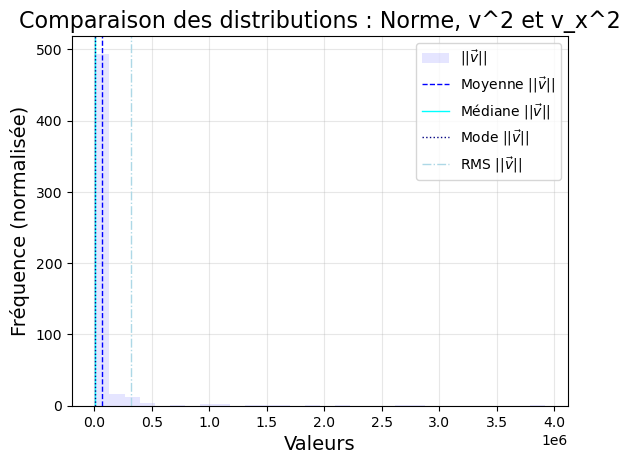

Statistiques pour v^2 :
Moyenne de v^2 : 100835273258.88875
Medianne de v^2 : 1210677.307369635
Mode de v^2 : 1472809.082108124
RMS de v^2 : 871537095317.5774


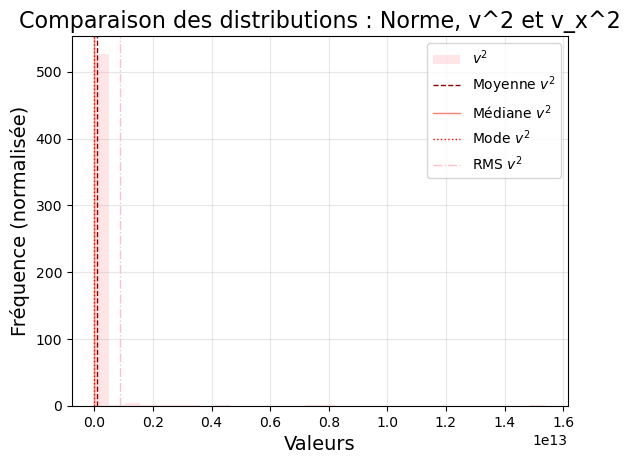

Statistiques pour v_x^2 :
Moyenne de v_x^2 : 153993363245.84857
Medianne de v_x^2 : 307564.0953343854
Mode de v_x^2 : 224382.51279148425
RMS de v_x^2 : 1166756171808.6123


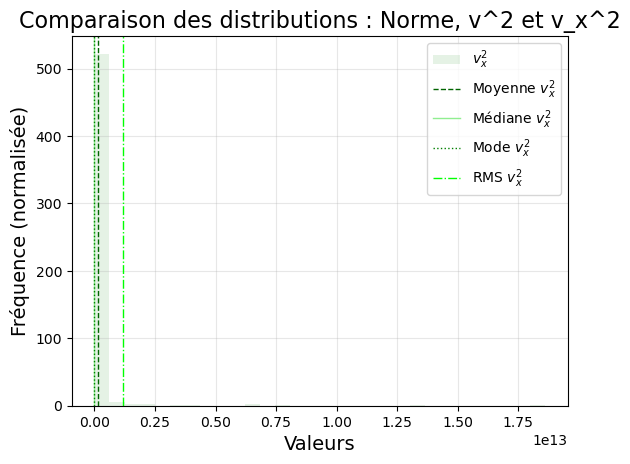

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import mode


def get_distance_temps_x_y(filename="distance_x_y_temps_collision_data.json"):
    with open(filename, 'r') as f:
        data = json.load(f)
    # Retourne toutes les dimensions disponibles (x, y)
    return [[item.get('distance_x', 0), item.get('distance_y', 0), item.get('temps', 0)] for item in data]

distance_x_y_temps = get_distance_temps_x_y()

distance_x = [item[0] for item in distance_x_y_temps]  # Liste des composantes distance x
distance_y = [item[1] for item in distance_x_y_temps]
temps = [item[2] for item in distance_x_y_temps]  # Liste des composantes temps

distance_1_x = []
distance_2_x = []

for i, val in enumerate(distance_x):
    if i % 2 == 0:
        distance_1_x.append(val)
    else:
        distance_2_x.append(val)

vitesses_x = []

for d1_x, d2_x, t1, t2 in zip(distance_1_x, distance_2_x, temps_1, temps_2):
    if t1 != t2:  # Avoid division by zero
        vitesses_x.append((d2_x - d1_x) / (t2 - t1))

norme = np.array(np.abs(vitesses))
vitesse_squared =np.array(vitesses) ** 2
vitesse_x_squared = np.array(vitesses_x) ** 2

def calculer_statistiques(data):
    moyenne = np.mean(data)
    med = np.median(data)
    mod = mode(data, keepdims=True)[0][0]
    rms = np.sqrt(np.mean(data ** 2))
    return moyenne, med, mod, rms


# Calcul des statistiques
stats_norme = calculer_statistiques(norme)
stats_v_squared = calculer_statistiques(vitesse_squared)
stats_v_x_squared = calculer_statistiques(vitesse_x_squared)

bins = 30

# Histogramme pour ||v||
plt.hist(norme, bins=bins, alpha=0.1, label=r'$||\vec{v}||$', color='blue')
plt.axvline(stats_norme[0], color='blue', linestyle='dashed', linewidth=1, label=r'Moyenne $||\vec{v}||$')
plt.axvline(stats_norme[1], color='cyan', linestyle='solid', linewidth=1, label=r'Médiane $||\vec{v}||$')
plt.axvline(stats_norme[2], color='navy', linestyle='dotted', linewidth=1, label=r'Mode $||\vec{v}||$')
plt.axvline(stats_norme[3], color='lightblue', linestyle='dashdot', linewidth=1, label=r'RMS $||\vec{v}||$')

print("Statistiques pour ||v|| :")
print(f"Moyenne de ||v|| : {stats_norme[0]}")
print(f"Medianne de ||v|| : {stats_norme[1]}")
print(f"Mode de ||v|| : {stats_norme[2]}")
print(f"RMS de ||v|| : {stats_norme[3]}")

plt.title("Comparaison des distributions : Norme, v^2 et v_x^2", fontsize=16)
plt.xlabel("Valeurs", fontsize=14)
plt.ylabel("Fréquence (normalisée)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Affichage du graphique
plt.show()

# Histogramme pour v^2
plt.hist(vitesse_squared, bins=bins, alpha=0.1, label=r'$v^2$', color='red')
plt.axvline(stats_v_squared[0], color='darkred', linestyle='dashed', linewidth=1, label=r'Moyenne $v^2$')
plt.axvline(stats_v_squared[1], color='salmon', linestyle='solid', linewidth=1, label=r'Médiane $v^2$')
plt.axvline(stats_v_squared[2], color='red', linestyle='dotted', linewidth=1, label=r'Mode $v^2$')
plt.axvline(stats_v_squared[3], color='pink', linestyle='dashdot', linewidth=1, label=r'RMS $v^2$')

print("Statistiques pour v^2 :")
print(f"Moyenne de v^2 : {stats_v_squared[0]}")
print(f"Medianne de v^2 : {stats_v_squared[1]}")
print(f"Mode de v^2 : {stats_v_squared[2]}")
print(f"RMS de v^2 : {stats_v_squared[3]}")

plt.title("Comparaison des distributions : Norme, v^2 et v_x^2", fontsize=16)
plt.xlabel("Valeurs", fontsize=14)
plt.ylabel("Fréquence (normalisée)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Affichage du graphique
plt.show()

# Histogramme pour v_x^2
plt.hist(vitesse_x_squared, bins=bins, alpha=0.1, label=r'$v_x^2$', color='green')
plt.axvline(stats_v_x_squared[0], color='darkgreen', linestyle='dashed', linewidth=1, label=r'Moyenne $v_x^2$')
plt.axvline(stats_v_x_squared[1], color='lightgreen', linestyle='solid', linewidth=1, label=r'Médiane $v_x^2$')
plt.axvline(stats_v_x_squared[2], color='green', linestyle='dotted', linewidth=1, label=r'Mode $v_x^2$')
plt.axvline(stats_v_x_squared[3], color='lime', linestyle='dashdot', linewidth=1, label=r'RMS $v_x^2$')

print("Statistiques pour v_x^2 :")
print(f"Moyenne de v_x^2 : {stats_v_x_squared[0]}")
print(f"Medianne de v_x^2 : {stats_v_x_squared[1]}")
print(f"Mode de v_x^2 : {stats_v_x_squared[2]}")
print(f"RMS de v_x^2 : {stats_v_x_squared[3]}")

# Configuration des labels et de la légende
plt.title("Comparaison des distributions : Norme, v^2 et v_x^2", fontsize=16)
plt.xlabel("Valeurs", fontsize=14)
plt.ylabel("Fréquence (normalisée)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Affichage du graphique
plt.show()


**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

In [ ]:

#

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le script fourni qui est exécuté dans ce _Notebook_ adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.
 
_**N.B. de débogage VPython:** Ayant plus codé en MATLAB qu'en Python jusqu'à maintenant, j'utilise Spyder qui offre une interface similaire, mais j'ai trouvé ce vidéo qui parle d'une <a href="https://www.youtube.com/watch?v=MJiVtz4Uj7M">installation VS code</a> qui peut-être aider? N'hésitez pas à partager de meilleures alternatives que j'ajouterai ici. Vous pouvez aussi tenter l'installation <a href="https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/">directement dans le Notebook</a>, mais au final chaque installation de distribution Python a son lot de <a href="https://xkcd.com/2347/">défis avec les dépendances</a>. Si rien ne fonctionne, n'hésitez pas à contacter la sympathique communauté qui développe et utilise cette librairie VPython d'abord via leur <a href="https://groups.google.com/g/vpython-users">groupe-forum</a>, puis leur <a href="https://github.com/vpython/vpython-jupyter">site GitHub</a> de dépôt de développement. J'ai toujours eu de bonnes expériences d'interaction avec eux!_ 
 